[0.14285714 0.14285714 0.20203051 0.20203051 0.24743583 0.20203051
 0.20203051 0.28571429 0.28571429 0.28571429 0.28571429 0.28571429
 0.28571429 0.28571429 0.28571429 0.28571429]
[0.27050089 0.27050089 0.27050089 0.27050089 0.27050089 0.27050089
 0.27050089 0.27050089 0.31234752 0.15617376 0.15617376 0.22086305
 0.22086305 0.27050089 0.22086305 0.22086305]


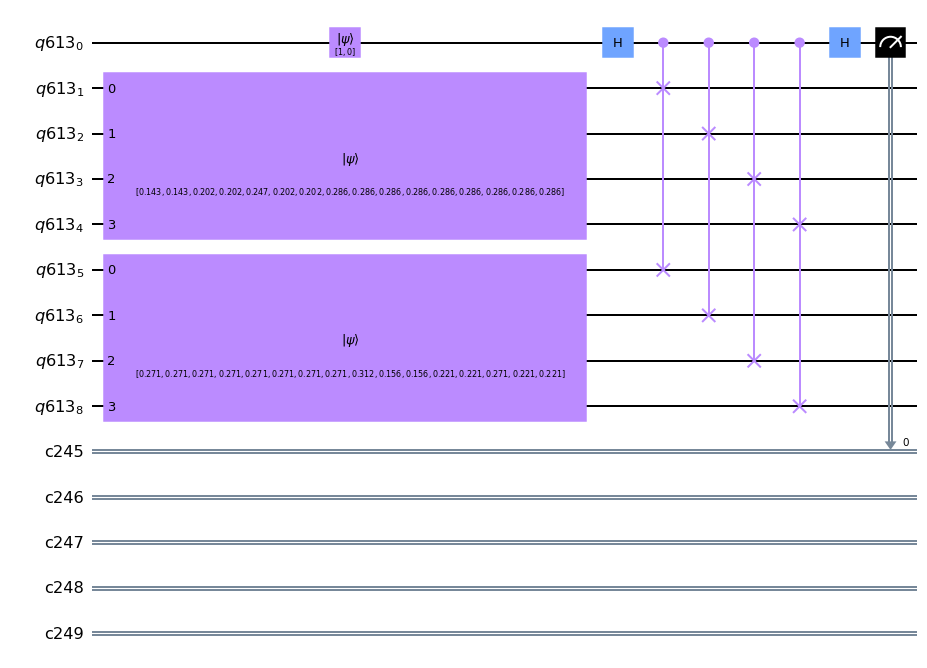

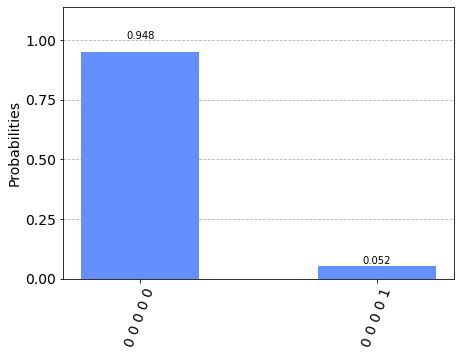

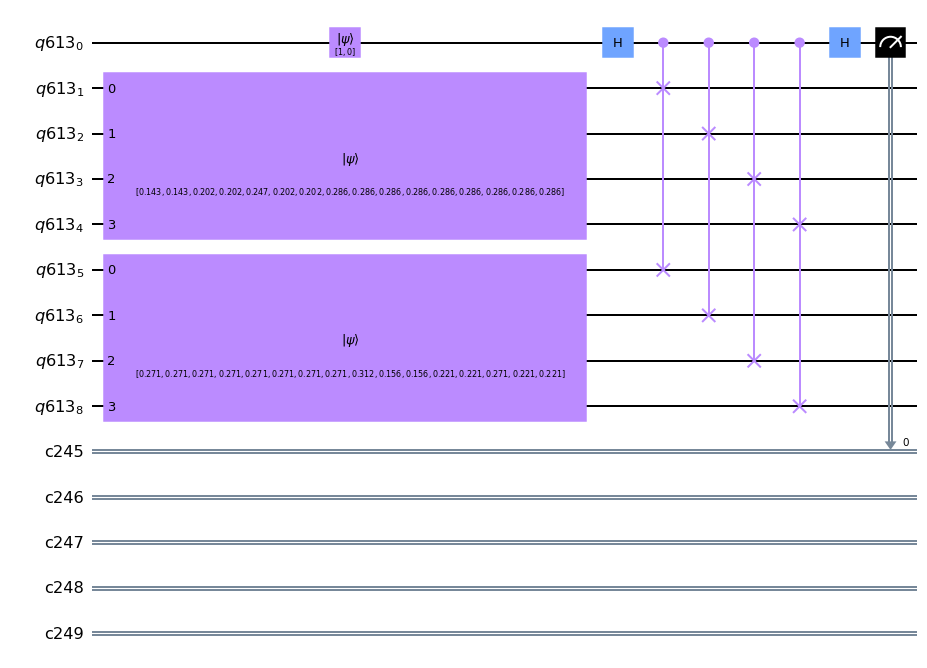

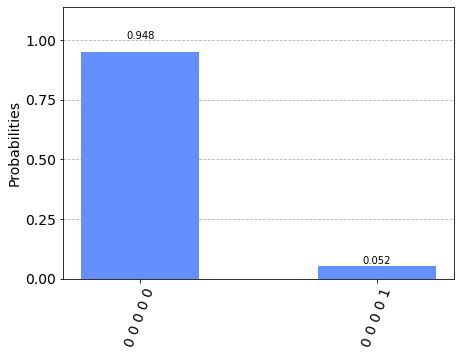

In [58]:
import qiskit as q
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



#DNAseq1="00000000AAAATTTT" with zero padding

DNAseq1="AACCGCCTTTTTTTTT"
DNAseq2="GGGGGGGGTAACCGCC"


# the swap test is practically useless for distinguishing multiqubit states
# it may be of more use with angle encoding which would likely lead to greater degrees of 'orthogonality'
# the swab test comes closest to the 50% 50% outcome when the state vectors are all orthogonal to each other
# zero padding misleadingly causes the greatest state difference



def DNA2Ampl(DNAseq):
    #amplitude encoding A=1 C=2 G=3 T=4 and 0 for padding
    
    ampl=[]
    sum=0
    for i in range(len(DNAseq)):
        if DNAseq[i]=="A":
            ampl.append(1)
            sum+=1
        elif DNAseq[i]=="C":
            ampl.append(2)
            sum+=2
        elif DNAseq[i]=="G":
            ampl.append(3)
            sum+=3
        elif DNAseq[i]=="T":
            ampl.append(4)
            sum+=4
        else:
            ampl.append(0)
            
    return ampl,sum
            
am1,sum1=DNA2Ampl(DNAseq1)
am2,sum2=DNA2Ampl(DNAseq2)

cqubit=np.array([1,0]) 
state1=np.sqrt(np.asarray(am1)/sum1)
state2=np.sqrt(np.asarray(am2)/sum2)

print(state1)
print(state2)

qr=q.QuantumRegister(9)
cr_0=q.ClassicalRegister(1)
cr_1=q.ClassicalRegister(1)
cr_2=q.ClassicalRegister(1)
cr_3=q.ClassicalRegister(1)
cr_4=q.ClassicalRegister(1)
circ = q.QuantumCircuit(qr,cr_0,cr_1,cr_2,cr_3,cr_4)
circ.initialize(cqubit,qr[0])
circ.initialize(state1,[1,2,3,4])
circ.initialize(state2,[5,6,7,8])

circ.h(qr[0])
for i in range(1,5):
    circ.cswap(qr[0],qr[i],qr[i+4])
circ.h(qr[0])
circ.measure(0,cr_0)


display(circ.draw(output="mpl"))


# Drawing the histogram

backend = q.Aer.get_backend('qasm_simulator')
job = q.execute(circ, backend, shots=10000)
result = job.result()
counts = result.get_counts(circ)

graph = q.visualization.plot_histogram(counts)

display(graph)



